### k-means clustering

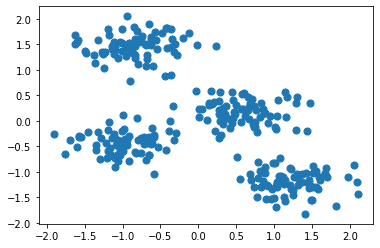

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)


### Making a k-means model

In [2]:
from sklearn.cluster import KMeans

# KMeans will run "n_init" times and it will give the best result based on inertia
model = KMeans(n_clusters=4, n_init = 10)

### We can look at how the data points are labeled

In [3]:
labels = model.fit_predict(X)
labels

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2], d

### How many unique labels are there?

In [5]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

### We can look at the cluster centers.

In [6]:
centroids = model.cluster_centers_
centroids

array([[ 1.21774671, -1.19712077],
       [-0.83691948,  1.46193015],
       [-0.96619422, -0.43906093],
       [ 0.58536699,  0.17425154]])

### Let's visualize the results by plotting the data colored by the labels. We will also plot the cluster centers.

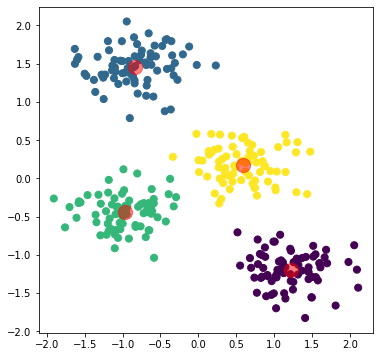

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

plt.savefig('clusters.png',dpi=300,transparent=True)

### What is the inertia for this model?

In [8]:
model.inertia_

56.02477057509949

### Can we evaluate the performance of the clustering since we have the "ground truth" in this example?

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y, labels)

0.25

### Q: Wait, what? Why do we have such a low accuracy?

### A: The label from k-means clustering (or any other clustering algorithms) does not have any meaning. It just tells us which cluster was identified first and which one is identified next.

Text(0.5, 1.0, 'k-means clustering')

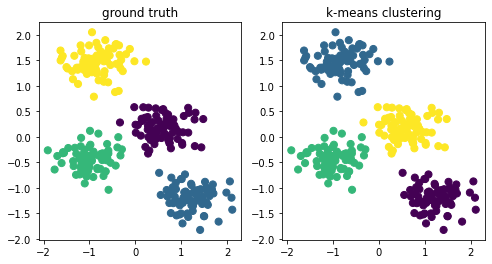

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
ax1.set_title('ground truth')

ax2.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax2.set_title('k-means clustering')


### What happens when we provide a sub-optimal number of clusters?

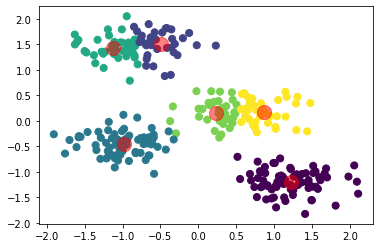

In [11]:
n_clusters = 6

model = KMeans(n_clusters = n_clusters)
model.fit(X)
labels = model.predict(X)
centers = model.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### What is the inertia for this model and how does this compare when we use n_clusters = 4?

In [12]:
model.inertia_

41.79780306314836

### Let's check out how inertia varies as a function of n_cluster.

In [13]:
kmeans_k = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(2, 11)]
inertias = [model.inertia_ for model in kmeans_k]

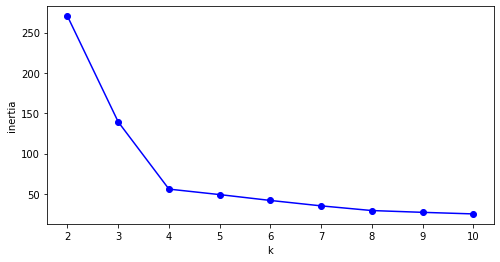

In [14]:
plt.figure(figsize=(8, 4))

plt.plot(range(2, 11), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

### n_cluster = 4 seems to be the elbow (or knee) in this example, but remember that inertia always decreases as we add more clusters and it may not necessarily a good metric to find the optimal n_cluster.

### An alternative is the silhouette score.

In [15]:
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters = 4)
model.fit(X)
silhouette_score(X, model.labels_)

0.6569234398199433

### How does the silhouette score vary as a function of n_clusters?

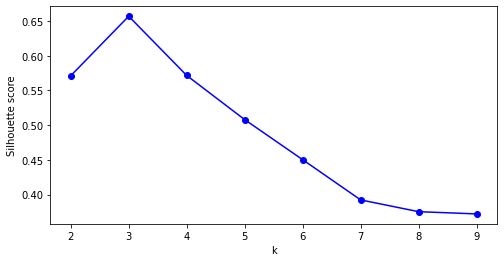

In [16]:
kmeans_k = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(2, 11)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_k[1:]]

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.show()

### Silhouette diagram (don't worry about memorizing the script below)

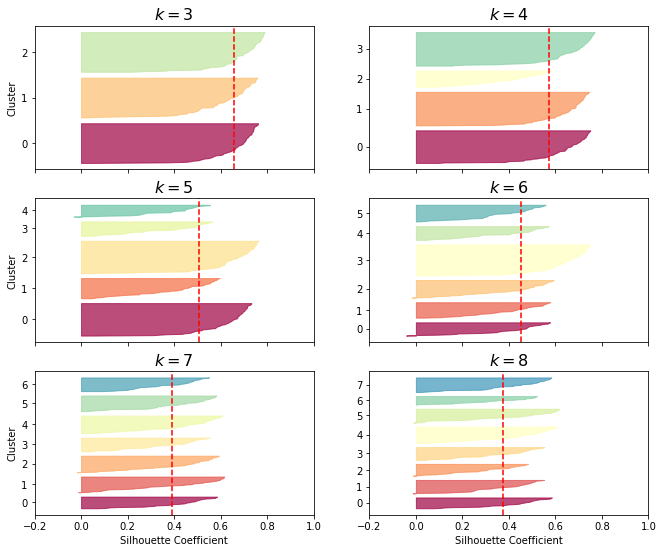

In [17]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)
    
    y_pred = kmeans_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5, 7):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.xlim(-0.2,1)
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


### Can we fix some of the cluster centers?

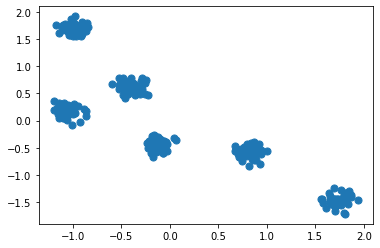

In [18]:
X, y = make_blobs(n_samples=300, centers=6, cluster_std=0.3, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

### I will manually choose 4 cluster centers and randomly pick 2 other cluster centers.

In [19]:
import random

n_clusters = 6

# Manually-chosen cluster centers
good_init = [[-1,0.25],[-0.4,0.6],[0.8,-0.6],[1.7,-1.5]]

# Adding two randomly-chosen cluster centers
good_init.append(list(X[random.randint(0,len(X)-1)]))
good_init.append(list(X[random.randint(0,len(X)-1)]))
good_init = np.array(good_init)

### Let's check out the initial cluster centers.

In [20]:
good_init

array([[-1.        ,  0.25      ],
       [-0.4       ,  0.6       ],
       [ 0.8       , -0.6       ],
       [ 1.7       , -1.5       ],
       [-0.36189329,  0.46493639],
       [-1.05150558,  0.14841052]])

### We can also visualize the initial cluster centers.

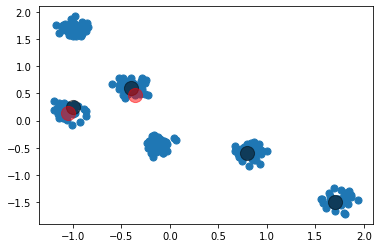

In [21]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(np.array(good_init)[:4, 0], np.array(good_init)[:4, 1], c='black', s=200, alpha=0.5)
plt.scatter(np.array(good_init)[4:, 0], np.array(good_init)[4:, 1], c='red', s=200, alpha=0.5)

### Let's train k-means and see how the cluster centers moved.

/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


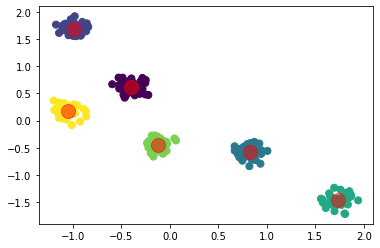

In [22]:
from sklearn.cluster import KMeans

# Note: When we give initial cluster centers, k-means will perform only one realization.
model = KMeans(n_clusters = n_clusters, init = good_init)
model.fit(X)
labels = model.predict(X)

centers = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Let's compare initial and final cluster centers.

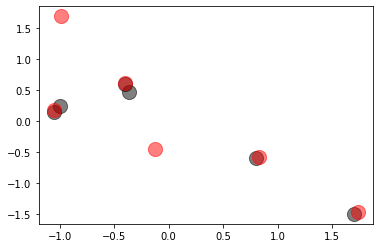

In [23]:
plt.scatter(good_init[:, 0], good_init[:, 1], c='black', s=200, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### As you can see, cluster centers can still move around and giving initial cluster centers does not guarantee that they will stay at the same location. 

If we really "fix" some cluster centers, we will have to edit the source code (which actually shouldn't be too hard).
Alternatively, we can try to give different weights when fitting the model but exactly how we weigh the data can be subtle/subjective. See an example here though: https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d

### k-means on MNIST data.

In [24]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.
X /= 255.

X.shape

(70000, 784)

### TODO: We know that there have to be 10 clusters. Let's train k-means using n_clusters=10.

In [25]:
import time 

tstart = time.time()

model = KMeans(n_clusters=10, random_state=0, n_init=10)
clusters = model.fit_predict(X)

print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

Elapsed Time: 27.29s


### Let's check the size of cluster centers.

In [26]:
model.cluster_centers_.shape

(10, 784)

### Let's check what the cluster centers look like.

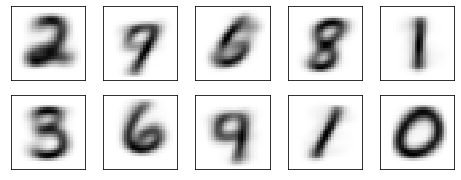

In [27]:
centers = model.cluster_centers_.reshape(10, 28, 28)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for ax, center in zip(ax.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Q: What do you see and how would you interpret the result?

### TODO: Apply PCA using 95 % of the total variance and train k-means. Compare the computing time.

In [28]:
from sklearn.decomposition import PCA

tstart = time.time()

pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(X)

model = KMeans(n_clusters=10, random_state=0, n_init=10)
clusters = model.fit_predict(X_pca)

print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

Elapsed Time: 13.26s


### What is the size of the cluster centers after PCA?

In [29]:
model.cluster_centers_.shape

(10, 154)

### TODO: Inverse transform the cluster centers and plot them.

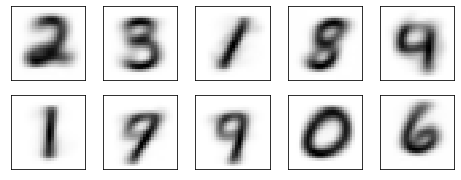

In [30]:
X_inverse = pca.inverse_transform(model.cluster_centers_)

centers = X_inverse.reshape(10, 28, 28)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for ax, center in zip(ax.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### DBSCAN

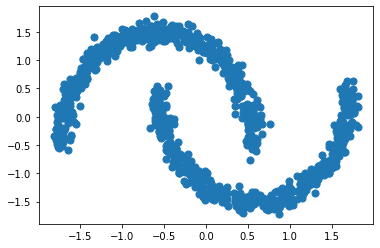

In [31]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Let's first check out k-means on this data.

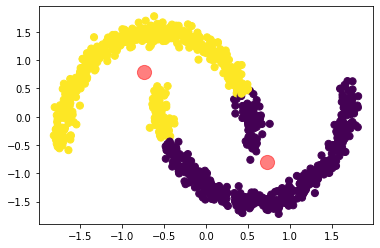

In [32]:
n_clusters = 2

model = KMeans(n_clusters = n_clusters)
model.fit(X)
labels = model.predict(X)

centers = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


### Let's try with the default hyperparameter values (eps=0.5, min_samples=5)

In [33]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(X)

DBSCAN()

### This is to make DBSCAN plots -- again, don't worry about memorizing the script.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, alpha=0.5)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

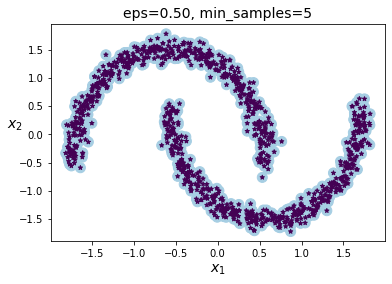

In [35]:
plot_dbscan(model, X, size=100)


### Q: What do you see? What does this mean, and how should we proceed?

### A: We should probably reduce epsilon.

### Let's try eps=0.05.

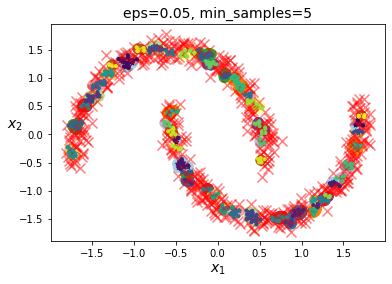

In [36]:
model = DBSCAN(eps=0.05, min_samples=5)
model.fit(X)

plot_dbscan(model, X, size=100)

In [37]:
len(np.unique(model.labels_))

52

### We probably went down too much. There are so many clusters (and noise). Let's try eps=0.1.

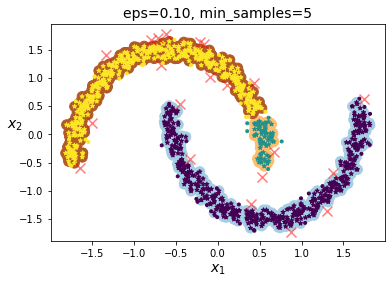

In [38]:
model = DBSCAN(eps=0.1)
model.fit(X)

plot_dbscan(model, X, size=100)

### Okay, it looks much better, but we may want to increase epsilon a little bit more. Let's try eps=0.15.

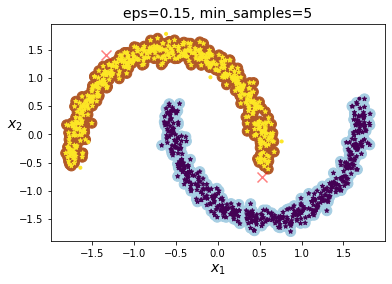

In [191]:
model = DBSCAN(eps=0.15)
model.fit(X)

plot_dbscan(model, X, size=100)

### Perfect! But is there a better way to do the optimization?

### We can try to compute the distance to the k nearest neighbors and determine epsilon from it.

In [42]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
neighbors = nn.fit(X)
distances, indices = neighbors.kneighbors(X)

In [43]:
distances

array([[0.        , 0.05601663, 0.09694564, 0.10231104, 0.12350095],
       [0.        , 0.02990693, 0.04719617, 0.04918573, 0.05410785],
       [0.        , 0.02587813, 0.08486852, 0.10263596, 0.11641225],
       ...,
       [0.        , 0.01064461, 0.04981285, 0.05625014, 0.06576485],
       [0.        , 0.02195811, 0.03195652, 0.0347297 , 0.05226182],
       [0.        , 0.01994161, 0.0438595 , 0.05826747, 0.05948166]])

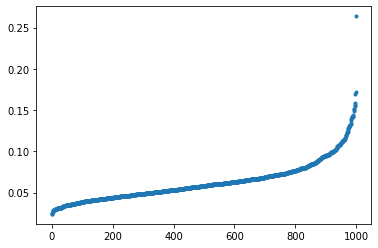

In [44]:
distances = distances[:,-1]
distances = np.sort(distances, axis=0)
plt.plot(distances, '.')

### Going back to the best DBSCAN model.

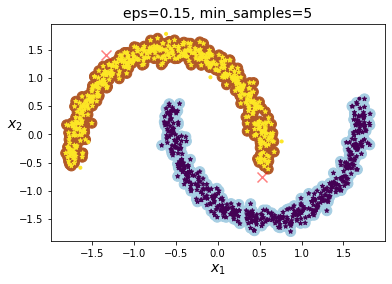

In [45]:
model = DBSCAN(eps=0.15, min_samples=5)
model.fit(X)

plot_dbscan(model, X, size=100)

### How many labels are there?

In [46]:
np.unique(model.labels_)

array([-1,  0,  1])

### How many data points are there in each clusters (or noise)?

In [47]:
np.bincount(model.labels_+1)

array([  2, 500, 498])

### How many core samples are there?

In [48]:
len(model.components_)

992

In [49]:
model.components_

array([[ 1.75081891,  0.48393978],
       [ 1.35606443, -0.90706929],
       [-0.90150442,  1.22470664],
       ...,
       [-0.202053  , -1.16108557],
       [-0.46412461, -0.2633107 ],
       [ 0.08084456, -1.39612327]])

### Q: How many non-core samples that is included in clusters are there?

### DBSCAN on MNIST data

In [50]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X = X[::10]

# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.
X = X / 255.

X.shape

(7000, 784)

### TODO: Apply PCA using 95 % of the total variance and train k-means.

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(X)
X_pca.shape

(7000, 152)

### TODO: Optimize hyperparameters.

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [53]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
neighbors = nn.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)

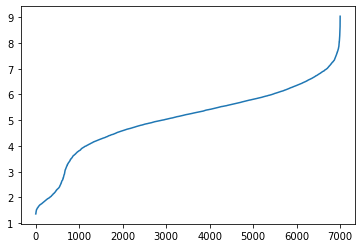

In [54]:
import matplotlib.pyplot as plt

distances = distances[:,-1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [61]:
dbscan = DBSCAN(eps=1.5)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0  1  2  3  4  5  6  7]


In [62]:
np.bincount(labels+1)

array([6949,    9,    5,    7,    6,    6,    8,    5,    5])

In [63]:
for eps in np.arange(1,10):
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [7000]

eps=2
Number of clusters: 6
Cluster sizes: [6564  383   18    9   18    8]

eps=3
Number of clusters: 3
Cluster sizes: [6294  700    6]

eps=4
Number of clusters: 20
Cluster sizes: [5473 1325   93   17    5   11    5    6   13    5    4    5    5    5
    5    4    5    5    5    4]

eps=5
Number of clusters: 19
Cluster sizes: [3138 3755   14    4    5    5    6    6   14    5    5    5    5    5
    4    8    4    7    5]

eps=6
Number of clusters: 4
Cluster sizes: [ 863 6131    3    3]

eps=7
Number of clusters: 2
Cluster sizes: [  90 6910]

eps=8
Number of clusters: 2
Cluster sizes: [   8 6992]

eps=9
Number of clusters: 1
Cluster sizes: [   0 7000]


In [64]:
dbscan = DBSCAN(eps=5)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


### Q: What eps and n_clusters did you end up with?

### TODO: Make plots showing averaged images for each cluster.

/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


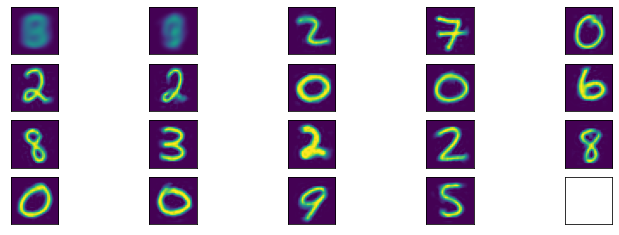

In [65]:
X_inverse = pca.inverse_transform(X_pca)

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_inverse[labels==i-1].mean(0).reshape(28,28), vmin=0, vmax=1)
    

### Q: How does the images distribute over each cluster? Did you find anything noticeable?

### Q: What do you think about the performance of DBSCAN on the MNIST dataset compared with k-means? And what do you think made the difference?